<font size="5">**Data Science Section 002 Group 7 Project Report**

<font size="3">**Research question:** How do the variables age, resting blood pressure, serum cholesterol, and maximum heart rate achieved affect the accuracy of a knn-classification model predicting the presence or absence of heart disease in individuals?

Predictive data analysis plays an important role in the field of medical diagnostics. As cardiovascular disease continues to be a leading cause of global mortality, the development of efficient predictive models becomes crucial for detection and intervention. This analysis focuses on predicting the presence or absence of heart disease using key parameters from the Heart Disease dataset (Cleveland database) available on the UCI Machine Learning Repository. The original database contains 76 attributes, but a version containing a subset of only 14 of those attributes will be used for this analysis. Out of those 14 variables, only 5 are chosen for observation in our project: age (age), resting blood pressure (trestbps), serum cholesterol (chol), maximum heart rate achieved (thalach), and our predicted variable, the diagnosis of heart disease (num, renamed "diagnosis").

To further understand our data, some preliminary exploratory data analysis is conducted below. To gain access to useful functions for reading and analyzing our data, the following libraries must be installed:

In [12]:
library(tidyverse)
library(tidymodels)

We can now read our dataset into R and assign it to an object called cleveland_data. We are also going to limit the amount of rows shown when previewing the dataset:

In [13]:
#Demostration that the dataset can be read from the web into R:
options(repr.matrix.max.rows = 10)

url <- "https://raw.githubusercontent.com/Nitro-87/Group-2-Project-Proposal/main/processed.cleveland.data"
cleveland_data <- read_delim(url, delim= "," , col_names=FALSE)

cleveland_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3


Since our data contains no column names, we rename each column with the appropriate variable name below. We also replace the numerical values under our categorical variables with what they are supposed to represent, to better understand what each variable reveals to us.

In [14]:
#Renaming columns:

cleveland_data <- rename(cleveland_data,
       age = X1,
       sex = X2,
       chest_pain_type = X3,
       trestbps = X4,
       chol = X5,
       fbs = X6,    
       restecg = X7,
       thalach = X8,
       exang = X9,
       oldpeak = X10,
       slope = X11,
       ca = X12,
       thal = X13,
       diagnosis = X14)

#skipping rows with missing values
cleveland_data<- cleveland_data |> drop_na()

glimpse(cleveland_data)

Rows: 303
Columns: 14
$ age             <dbl> 63, 67, 67, 37, 41, 56, 62, 57, 63, 53, 57, 56, 56, 44…
$ sex             <dbl> 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, …
$ chest_pain_type <dbl> 1, 4, 4, 3, 2, 2, 4, 4, 4, 4, 4, 2, 3, 2, 3, 3, 2, 4, …
$ trestbps        <dbl> 145, 160, 120, 130, 130, 120, 140, 120, 130, 140, 140,…
$ chol            <dbl> 233, 286, 229, 250, 204, 236, 268, 354, 254, 203, 192,…
$ fbs             <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, …
$ restecg         <dbl> 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, …
$ thalach         <dbl> 150, 108, 129, 187, 172, 178, 160, 163, 147, 155, 148,…
$ exang           <dbl> 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, …
$ oldpeak         <dbl> 2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 1.4, 3.1, 0.4,…
$ slope           <dbl> 3, 2, 2, 3, 1, 1, 3, 1, 2, 3, 2, 2, 2, 1, 1, 1, 3, 1, …
$ ca              <chr> "0.0", "3.0", "2.0", "0.0", "0.0", "0.0", "2.0", "0.0"…
$ thal            

In [15]:
#renaming categorical variables:

#renaming sex values
cleveland_data <- cleveland_data |>
mutate(sex = as_factor(sex))|>
mutate(sex = fct_recode(sex, "female" = "0", 
                            "male" = "1"))
#renaming chest pain values
cleveland_data <- cleveland_data |>
mutate(chest_pain_type = as_factor(chest_pain_type))|>
mutate(chest_pain_type = fct_recode(chest_pain_type, 
                            "typical angina" = "1", 
                            "atypical angina" = "2", 
                            "non-anginal_pain" = "3", 
                            "asymptomatic" = "4"))
#renaming fbs values
cleveland_data <- cleveland_data |>
mutate(fbs = as_factor(fbs))|>
mutate(fbs = fct_recode(fbs, "false" = "0", 
                            "true" = "1"))

#renaming exang values
cleveland_data <- cleveland_data |>
mutate(exang = as_factor(exang))|>
mutate(exang = fct_recode(exang, "no" = "0", 
                            "yes" = "1"))
#renaming slope values
cleveland_data <- cleveland_data |>
mutate(slope = as_factor(slope))|>
mutate(slope = fct_recode(thal,"upsloping" = "1", 
                            "flat" = "2", 
                            "downsloping" = "3"))
#renaming thal values
cleveland_data <- cleveland_data |>
mutate(thal = as_factor(thal))|>
mutate(thal = fct_recode(thal, "reversible defect" = "7.0", 
                            "fixed defect" = "6.0", 
                            "normal" = "3.0"))
#renaming diagnosis values
cleveland_data <- cleveland_data |>
mutate(diagnosis = as_factor(diagnosis))|>
mutate(diagnosis = fct_recode(diagnosis, 
                            "absent" = "0",
                              "present" = "1", 
                            "present" = "2", 
                            "present" = "3", 
                            "present" = "4"))

glimpse(cleveland_data)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `slope = fct_recode(thal, upsloping = "1", flat = "2",
  downsloping = "3")`.
Caused by warning:
! Unknown levels in `f`: 1, 2, 3”


Rows: 303
Columns: 14
$ age             <dbl> 63, 67, 67, 37, 41, 56, 62, 57, 63, 53, 57, 56, 56, 44…
$ sex             <fct> male, male, male, male, female, male, female, female, …
$ chest_pain_type <fct> typical angina, asymptomatic, asymptomatic, non-angina…
$ trestbps        <dbl> 145, 160, 120, 130, 130, 120, 140, 120, 130, 140, 140,…
$ chol            <dbl> 233, 286, 229, 250, 204, 236, 268, 354, 254, 203, 192,…
$ fbs             <fct> true, false, false, false, false, false, false, false,…
$ restecg         <dbl> 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, …
$ thalach         <dbl> 150, 108, 129, 187, 172, 178, 160, 163, 147, 155, 148,…
$ exang           <fct> no, yes, yes, no, no, no, no, yes, no, yes, no, no, ye…
$ oldpeak         <dbl> 2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 1.4, 3.1, 0.4,…
$ slope           <fct> 6.0, 3.0, 7.0, 3.0, 3.0, 3.0, 3.0, 3.0, 7.0, 7.0, 6.0,…
$ ca              <chr> "0.0", "3.0", "2.0", "0.0", "0.0", "0.0", "2.0", "0.0"…
$ thal            

We then want to filter our dataset to only include the diagnosis and variables that we want to observe which are age, chol, tresbps and thalach.

In [16]:
cleveland_data_select <- select(cleveland_data, age, trestbps, chol, thalach, diagnosis)
cleveland_data_select

age,trestbps,chol,thalach,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,145,233,150,absent
67,160,286,108,present
67,120,229,129,present
37,130,250,187,absent
41,130,204,172,absent
⋮,⋮,⋮,⋮,⋮
45,110,264,132,present
68,144,193,141,present
57,130,131,115,present


Now that our data is tidy and filtered, we can split it into a training set to construct our model, and a testing set to test our model's effectiveness.

In [17]:
#splitting data into training and testing sets

cleveland_data_split <- initial_split(cleveland_data_select, prop = 0.75, strata = diagnosis)
training_set <- training(cleveland_data_split)
testing_set <- testing(cleveland_data_split)

training_set
testing_set

age,trestbps,chol,thalach,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,145,233,150,absent
37,130,250,187,absent
41,130,204,172,absent
57,140,192,148,absent
56,140,294,153,absent
⋮,⋮,⋮,⋮,⋮
59,164,176,90,present
57,140,241,123,present
45,110,264,132,present


age,trestbps,chol,thalach,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
56,120,236,178,absent
57,120,354,163,absent
44,120,263,173,absent
49,130,266,171,absent
58,150,283,162,absent
⋮,⋮,⋮,⋮,⋮
55,132,342,166,absent
63,140,187,144,present
63,124,197,136,present


Below is a table conducting exploratory analysis on our training dataset. This table tells us the number and percentage of observations in each class group (whether there is a presence/absence of heart disease).

In [18]:
num_obs <- nrow(training_set)
training_set |>
  group_by(diagnosis) |>
  summarize(
    count = n(),
    percentage = n() / num_obs * 100)

diagnosis,count,percentage
<fct>,<int>,<dbl>
absent,123,54.18502
present,104,45.81498


We can also use the training dataset to create a set of histograms to show us the distributions and values for each variable.

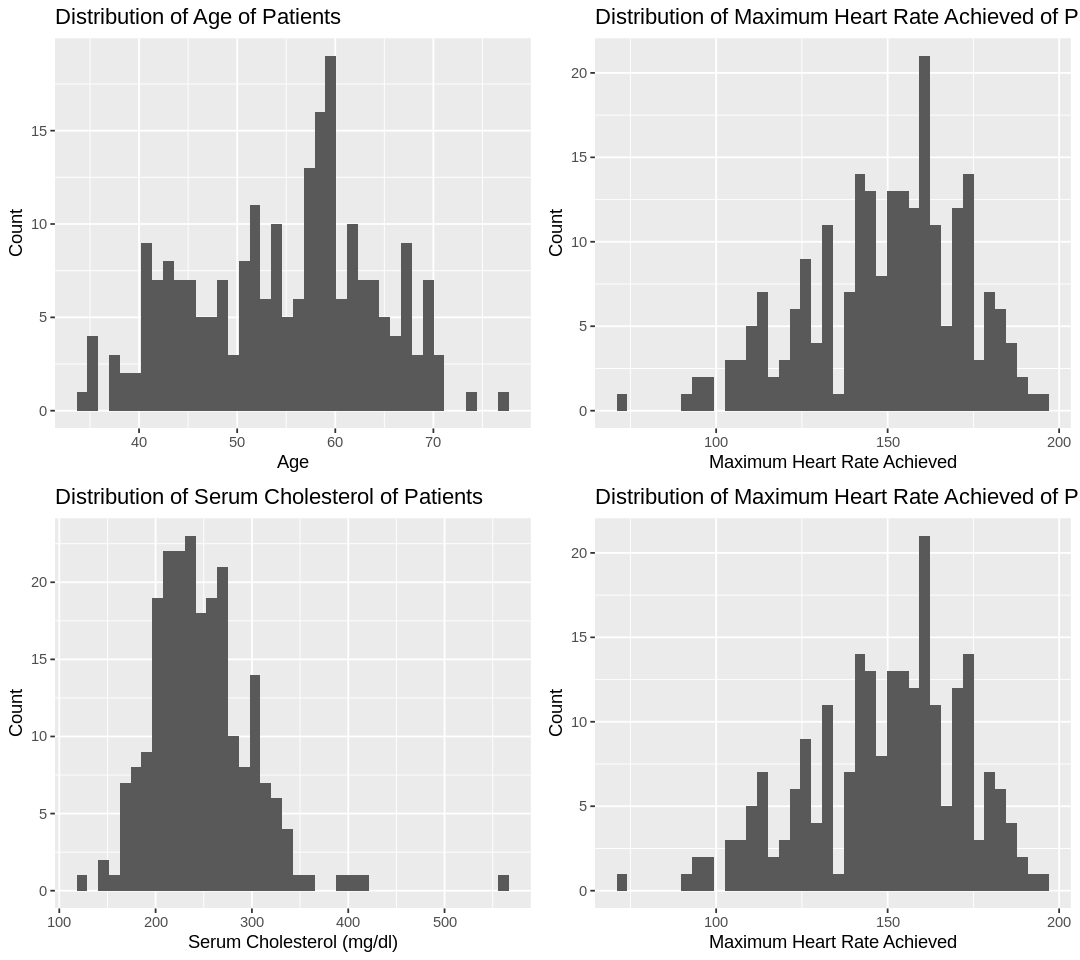

In [22]:
options(repr.plot.width = 9, repr.plot.height = 8)
age_hist <- ggplot(training_set, aes(x = age)) +
                geom_histogram(bins = 40) + 
                labs(x = "Age", y = "Count", title = "Distribution of Age of Patients")

thalach_hist <- ggplot(training_set, aes(x = thalach)) +
                geom_histogram(bins = 40) + 
                labs(x = "Maximum Heart Rate Achieved", y = "Count", title = "Distribution of Maximum Heart Rate Achieved of Patients")

chol_hist <- ggplot(training_set, aes(x = chol)) +
                geom_histogram(bins = 40) + 
                labs(x = "Serum Cholesterol (mg/dl)", y = "Count", title = "Distribution of Serum Cholesterol of Patients")

trestbps <- ggplot(training_set, aes(x = trestbps)) +
                geom_histogram(bins = 40) + 
                labs(x = "Resting Blood Pressure", y = "Count", title = "Distribution of Resting Blood Pressure of Patients")

gridExtra::grid.arrange(age_hist, trestbps_hist, chol_hist, thalach_hist, ncol = 2)

We have chosen to use the K-nearest neighbors classification algorithm to continue our analysis, as it allows us to scale and compare our different variables in an easy and efficient way. The goal is to create and test a model using the training and testing data, respectively. We will be using this model to analyze the data in relation to the selected variables, and aim to effectively classify our testing data.

By the end of this analysis, we expect to gain insight into the complex relationships between our chosen variables and the presence of heart disease in patients. Such findings would contribute to medical research regarding cardiovascular disease by allowing healthcare systems to identify and focus on individuals at higher risk of heart diseases, enabling earlier intervention, and potentially reducing healthcare costs associated with advanced stages of heart disease. The analysis also prompts various questions for future analyses, such as exploring the interaction between lifestyle factors (smoking habits, exercise, and diet) and our chosen variables of cholesterol, age, heart rate and blood pressure in influencing the risk of heart disease.

The goal of our analysis is to see which of the above variables in combination are most affective at predicting the presence of heart disease in patients. To do so, we will utilize cross validation for each variable, to build a KNN model for each variable, so that we may compare their effectiveness on a subset of our training data. Afterwards we will use the indicators we deemed effective for our KNN model on our testing data, and compare this to the efficacy of a KNN model using all of the four variables. In our analysis we will prioritize recall and accuracy, because of the possibly life affecting nature of heart disease which may cause heart attack or stroke. $\color{red}{\text{citation needed}}$

To achieve this, we will need to split our training data again, so that we can use a portion of it to test our classifiers on each variable.

In [23]:
training_split <- initial_split(training_set,prop = 0.75, strata = diagnosis)
training_subset <- training(training_split)
testing_subset <- testing(training_split)

Since we are doing the same analysis on each variable, we will do it side by side in the same code cells, as the code will be almost identical.

In [24]:
#This model will be used for all classifications
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> set_engine("kknn") |> set_mode("classification")

age_recipe <- recipe(diagnosis ~ age, data=training_subset) |> step_scale(all_predictors()) |> step_center(all_predictors())
heart_rate_recipe <-  recipe(diagnosis ~ thalach, data=training_subset) |> step_scale(all_predictors()) |> step_center(all_predictors())
cholesterol_recipe <- recipe(diagnosis ~ chol, data=training_subset) |> step_scale(all_predictors()) |> step_center(all_predictors())
blood_pressure_recipe <- recipe(diagnosis ~ trestbps, data=training_subset) |> step_scale(all_predictors()) |> step_center(all_predictors())